<a href="https://colab.research.google.com/github/Phaeld/udemy-projects/blob/main/exercicio_algoritmo_busca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de Busca Gulosa e A*

Olá,

O objetivo desta tarefa é utilizar o mesmo código fonte das aulas anteriores para construir o exemplo abaixo. A cidade de origem é Porto União e a cidade de destino é Curitiba. No mapa abaixo você pode visualizar as distâncias pela estrada entre cada uma das cidades

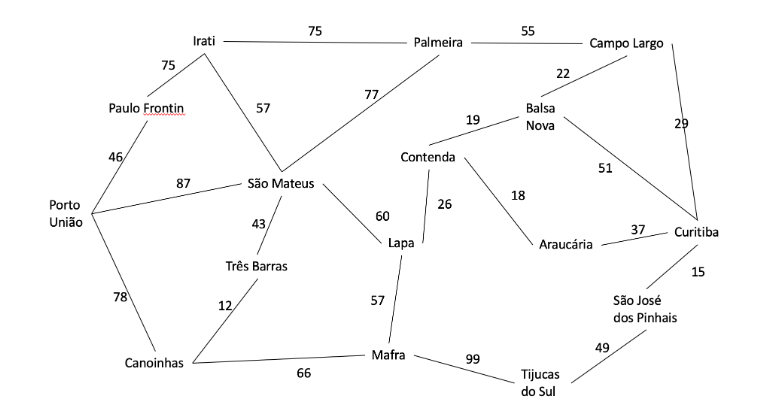

Abaixo você pode observar a tabela com as heurísticas com a distância em linha reta entre todas as cidades e o objetivo (Curitiba)

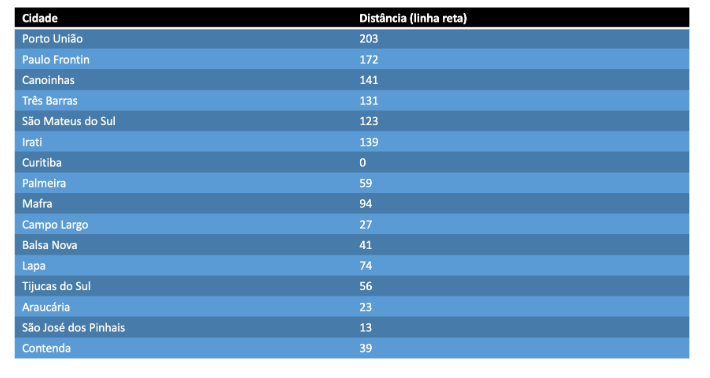

In [ ]:
# Criar a classe vertice para rotular as cidades, distancia, adicionar adjacente e mostrar
class Vertice:

  def __init__(self, rotulo, distancia_objetivo):
    self.rotulo = rotulo
    self.distancia_objetivo = distancia_objetivo
    self.visitado = False
    self.adjacentes = []

  def adiciona_adjacente(self, adjacente):
    self.adjacentes.append(adjacente)

  def mostrar_adjacentes(self):
    for i in self.adjacentes:
      print(i.vertice.rotulo, i.custo)

# Criar a classe adjacente para os parametros vertice e custo
class Adjacente:

  def __init__(self, vertice, custo):
    self.vertice = vertice
    self.custo = custo
    self.distancia_aestrela = vertice.distancia_objetivo + self.custo

In [ ]:
# Criar u grafo para armazenar os valores das cidades e adicionar adjacentes
class Grafo:

  porto_uniao = Vertice('Porto União', 203)
  paulo_frontin = Vertice('Paulo Frontin', 172)
  canoinhas = Vertice('Canoinhas', 141)
  tres_barras = Vertice('Três Barras', 131)
  sao_mateus_do_sul = Vertice('São Mateus do Sul', 123)
  irati = Vertice('Irati', 139)
  curitiba = Vertice('Curitiba', 0)
  palmeiras = Vertice('Palmeiras', 59)
  mafra = Vertice('Mafra', 94)
  campo_largo = Vertice('Campo Largo', 27)
  balsa_nova = Vertice('Balsa Nova', 41)
  lapa = Vertice('Lapa', 74)
  tijucas_do_sul = Vertice('Tijucas do Sul', 56)
  araucaria = Vertice('Araucária', 23)
  sao_jose_dos_pinhais = Vertice('São José dos Pinhais', 13)
  contenda = Vertice('Contenda', 39)

  porto_uniao.adiciona_adjacente(Adjacente(paulo_frontin, 46))
  porto_uniao.adiciona_adjacente(Adjacente(sao_mateus_do_sul, 87))
  porto_uniao.adiciona_adjacente(Adjacente(canoinhas, 78))

  paulo_frontin.adiciona_adjacente(Adjacente(porto_uniao, 46))
  paulo_frontin.adiciona_adjacente(Adjacente(irati, 75))

  irati.adiciona_adjacente(Adjacente(paulo_frontin, 75))
  irati.adiciona_adjacente(Adjacente(palmeiras, 75))
  irati.adiciona_adjacente(Adjacente(sao_mateus_do_sul, 57))

  palmeiras.adiciona_adjacente(Adjacente(irati, 75))
  palmeiras.adiciona_adjacente(Adjacente(campo_largo, 55))

  campo_largo.adiciona_adjacente(Adjacente(palmeiras, 55))
  campo_largo.adiciona_adjacente(Adjacente(balsa_nova, 22))
  campo_largo.adiciona_adjacente(Adjacente(curitiba, 29))

  sao_mateus_do_sul.adiciona_adjacente(Adjacente(porto_uniao, 87))
  sao_mateus_do_sul.adiciona_adjacente(Adjacente(irati, 57))
  sao_mateus_do_sul.adiciona_adjacente(Adjacente(palmeiras, 77))
  sao_mateus_do_sul.adiciona_adjacente(Adjacente(lapa, 60))
  sao_mateus_do_sul.adiciona_adjacente(Adjacente(tres_barras, 43))

  lapa.adiciona_adjacente(Adjacente(sao_mateus_do_sul, 60))
  lapa.adiciona_adjacente(Adjacente(contenda, 26))
  lapa.adiciona_adjacente(Adjacente(mafra, 57))

  contenda.adiciona_adjacente(Adjacente(lapa, 26))
  contenda.adiciona_adjacente(Adjacente(balsa_nova, 19))
  contenda.adiciona_adjacente(Adjacente(araucaria, 18))

  balsa_nova.adiciona_adjacente(Adjacente(contenda, 19))
  balsa_nova.adiciona_adjacente(Adjacente(campo_largo, 22))
  balsa_nova.adiciona_adjacente(Adjacente(curitiba, 51))

  araucaria.adiciona_adjacente(Adjacente(contenda, 18))
  araucaria.adiciona_adjacente(Adjacente(curitiba, 37))

  canoinhas.adiciona_adjacente(Adjacente(porto_uniao, 78))
  canoinhas.adiciona_adjacente(Adjacente(tres_barras, 12))
  canoinhas.adiciona_adjacente(Adjacente(mafra, 66))

  tres_barras.adiciona_adjacente(Adjacente(canoinhas, 12))
  tres_barras.adiciona_adjacente(Adjacente(sao_mateus_do_sul, 43))

  mafra.adiciona_adjacente(Adjacente(canoinhas, 66))
  mafra.adiciona_adjacente(Adjacente(lapa, 57))
  mafra.adiciona_adjacente(Adjacente(tijucas_do_sul, 99))

  tijucas_do_sul.adiciona_adjacente(Adjacente(mafra, 99))
  tijucas_do_sul.adiciona_adjacente(Adjacente(sao_jose_dos_pinhais, 49))

  sao_jose_dos_pinhais.adiciona_adjacente(Adjacente(tijucas_do_sul, 49))
  sao_jose_dos_pinhais.adiciona_adjacente(Adjacente(curitiba, 15))

  curitiba.adiciona_adjacente(Adjacente(campo_largo, 29))
  curitiba.adiciona_adjacente(Adjacente(balsa_nova, 51))
  curitiba.adiciona_adjacente(Adjacente(araucaria, 37))
  curitiba.adiciona_adjacente(Adjacente(sao_jose_dos_pinhais, 19))



In [ ]:
# Incluido biblioteca Numpy
import numpy as np

In [ ]:
# Criando vetor para a busca Gulosa
class VetorOrdenadoG:

  def __init__(self, capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    self.valores = np.empty(self.capacidade, dtype=object)

  def insere(self, vertice):
    if self.ultima_posicao == self.capacidade -1:
      print('Capacidade máxima atiginda.')
      return

    posicao = 0
    for i in range(self.ultima_posicao + 1):
      posicao = i
      if self.valores[i].distancia_objetivo > vertice.distancia_objetivo:
        break
      if i == self.ultima_posicao:
        posicao = i + 1

    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x + 1] = self.valores[x]
      x -= 1

    self.valores[posicao] = vertice
    self.ultima_posicao += 1

  def imprime(self):
    if self.ultima_posicao == -1:
      print('Vetor está vazio.')
    else:
      for i in range(self.ultima_posicao + 1):
        print(i, ' | ', self.valores[i].rotulo, ' | ', self.valores[i].distancia_objetivo)

In [ ]:
# Criando vetor para busca A*
class VetorOrdenadoA:

  def __init__(self, capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    self.valores = np.empty(self.capacidade, dtype=object)


  def insere(self, adjacente):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade máxima atingida')
      return
    posicao = 0
    for i in range(self.ultima_posicao + 1):
      posicao = i
      if self.valores[i].distancia_aestrela > adjacente.distancia_aestrela:
        break
      if i == self.ultima_posicao:
        posicao = i + 1
    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x + 1] = self.valores[x]
      x -= 1
    self.valores[posicao] = adjacente
    self.ultima_posicao += 1

  def imprime(self):
    if self.ultima_posicao == -1:
      print('Vetor está vazio')
    else:
      for i in range(self.ultima_posicao + 1):
        print(i, ' | ', self.valores[i].vertice.rotulo, ' | ',
              self.valores[i].custo, ' | ',
              self.valores[i].vertice.distancia_objetivo, ' | ',
              self.valores[i].distancia_aestrela)

# AMBIENTE DE EXECUÇÃO
---

### Algoritmo de Busca Gulosa

In [ ]:
# Cria as variaveis e recebe as classes
grafo = Grafo()
vetor = VetorOrdenadoG(6)

# Insere no vetor as para a visualização funcionamento do insere e imprime
vetor.insere(grafo.porto_uniao)
vetor.insere(grafo.sao_mateus_do_sul)
vetor.insere(grafo.curitiba)
vetor.insere(grafo.lapa)
vetor.insere(grafo.araucaria)
vetor.imprime()

0  |  Curitiba  |  0
1  |  Araucária  |  23
2  |  Lapa  |  74
3  |  São Mateus do Sul  |  123
4  |  Porto União  |  203


In [ ]:
vetor.insere(grafo.tijucas_do_sul)
vetor.imprime()

0  |  Curitiba  |  0
1  |  Araucária  |  23
2  |  Tijucas do Sul  |  56
3  |  Lapa  |  74
4  |  São Mateus do Sul  |  123
5  |  Porto União  |  203


In [ ]:
vetor.valores[0], vetor.valores[0].rotulo

(<__main__.Vertice at 0x7c9737bdf520>, 'Curitiba')

In [ ]:
# Criando a classe Gulosa
class Gulosa:

  def __init__(self, objetivo):
    self.objetivo = objetivo
    self.encontrado = False

  def buscar(self, atual):
    print('==============')
    print('Atual: {}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenadoG(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado == True
          vetor_ordenado.insere(adjacente.vertice)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0])

In [ ]:
# Execução da aplicação
busca_gulosa = Gulosa(grafo.curitiba)
busca_gulosa.buscar(grafo.porto_uniao)

Atual: Porto União
0  |  São Mateus do Sul  |  123
1  |  Canoinhas  |  141
2  |  Paulo Frontin  |  172
Atual: São Mateus do Sul
0  |  Palmeiras  |  59
1  |  Lapa  |  74
2  |  Três Barras  |  131
3  |  Irati  |  139
Atual: Palmeiras
0  |  Campo Largo  |  27
1  |  Irati  |  139
Atual: Campo Largo
0  |  Curitiba  |  0
1  |  Balsa Nova  |  41
Atual: Curitiba


---
### Algoritmo de Busca A*

In [ ]:
# Cria as variaveis e recebe as classes
grafo = Grafo()
vetor = VetorOrdenadoA(6)

# Insere no vetor as para a visualização funcionamento do insere e imprime
vetor.insere(grafo.porto_uniao)
vetor.imprime()

AttributeError: 'Vertice' object has no attribute 'vertice'

In [ ]:
vetor.insere(grafo.mafra)
vetor.imprime()

In [ ]:
grafo.porto_uniao.adjacentes

In [ ]:
grafo.porto_uniao.adjacentes[0].vertice.rotulo, grafo.porto_uniao.adjacentes[0].vertice.distancia_objetivo

('Paulo Frontin', 172)

In [ ]:
grafo.porto_uniao.adjacentes[0].distancia_aestrela, grafo.porto_uniao.adjacentes[0].custo

(218, 46)

In [ ]:
vetor = VetorOrdenadoA(6)
vetor.insere(grafo.porto_uniao.adjacentes[0])
vetor.insere(grafo.porto_uniao.adjacentes[1])
vetor.insere(grafo.porto_uniao.adjacentes[2])

vetor.imprime()

0  |  São Mateus do Sul  |  87  |  123  |  210
1  |  Paulo Frontin  |  46  |  172  |  218
2  |  Canoinhas  |  78  |  141  |  219


In [ ]:
# Criando a classe AEstrela
class AEstrela:

  def __init__(self, objetivo):
    self.objetivo = objetivo
    self.encontrado = False

  def buscar(self, atual):
    print('==========')
    print('Atual: {}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenadoA(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado == True
          vetor_ordenado.insere(adjacente)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0].vertice)


In [ ]:
# Execução da aplicação
busca_aestrela = AEstrela(grafo.curitiba)
busca_aestrela.buscar(grafo.porto_uniao)

Atual: Porto União
0  |  São Mateus do Sul  |  87  |  123  |  210
1  |  Paulo Frontin  |  46  |  172  |  218
2  |  Canoinhas  |  78  |  141  |  219
Atual: São Mateus do Sul
0  |  Lapa  |  60  |  74  |  134
1  |  Palmeiras  |  77  |  59  |  136
2  |  Três Barras  |  43  |  131  |  174
3  |  Irati  |  57  |  139  |  196
Atual: Lapa
0  |  Contenda  |  26  |  39  |  65
1  |  Mafra  |  57  |  94  |  151
Atual: Contenda
0  |  Araucária  |  18  |  23  |  41
1  |  Balsa Nova  |  19  |  41  |  60
Atual: Araucária
0  |  Curitiba  |  37  |  0  |  37
Atual: Curitiba
